In [2]:
import pandas as pd
import seaborn as sns

In [27]:
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [16,8]
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [4]:
foo =r'D:\AIRQO\AirQloud\AQI-OVERVIEW/2022/Q3.csv'

In [5]:
df_k= pd.read_csv(foo)
df_k.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11820\3139910979.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_k= pd.read_csv(foo)


,tenant,timestamp,site_id,site_name,site_description,site_latitude,site_longitude,site_altitude,device_number,device_id,...,site_distance_to_nearest_secondary_road,site_distance_to_nearest_unclassified_road,country,region,district,city,county,sub_county,parish,device_category
0,kcca,2022-07-01 00:00:00 UTC,60d2b7e27e9018a1a8d38c28,Makindye,Makindye,0.285751,32.578325,1212.947510,0,NaN,...,291.2,672.69,Uganda,Central Region,Kampala,Kampala,Kampala,Makindye Division,Makindye Division,lowcost
1,kcca,2022-07-01 00:00:00 UTC,60d2b0557e9018a1a8d38c12,Rubaga,Rubaga,0.329428,32.551303,1231.735962,0,NaN,...,NaN,NaN,Uganda,Central Region,Kampala,Kampala,Kampala,Rubaga Division,Rubaga Division,lowcost
2,kcca,2022-07-01 00:00:00 UTC,60d2b0d77e9018a1a8d38c15,KampalaCentral,Kampala Central,0.315446,32.586709,1188.103271,0,NaN,...,NaN,NaN,Uganda,Central Region,Kampala,Kampala,Kampala,Kampala Central Division,Kampala Central Division,lowcost
3,kcca,2022-07-01 00:00:00 UTC,60d2affe7e9018a1a8d38c10,"Luzira, Nakawa",Nakawa,0.299092,32.647930,1147.767334,0,NaN,...,NaN,NaN,Uganda,Central Region,Kampala,Kampala,Kampala,Nakawa,Nakawa,lowcost
4,kcca,2022-07-01 00:00:00 UTC,60d2b5fd7e9018a1a8d38c1d,Kawempe,Kawempe,0.353465,32.560322,1170.848511,0,NaN,...,NaN,NaN,Uganda,Central Region,Kampala,Kampala,Kampala,Kawempe Division,Kawempe Division,lowcost


In [6]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137827 entries, 0 to 137826
Data columns (total 62 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   tenant                                      137827 non-null  object 
 1   timestamp                                   137827 non-null  object 
 2   site_id                                     137827 non-null  object 
 3   site_name                                   137827 non-null  object 
 4   site_description                            137827 non-null  object 
 5   site_latitude                               137827 non-null  float64
 6   site_longitude                              137827 non-null  float64
 7   site_altitude                               136808 non-null  float64
 8   device_number                               137827 non-null  int64  
 9   device_id                                   55897 non-null   object 
 

In [7]:
df_k=df_k[['timestamp','pm2_5','pm10','no2_calibrated_value','site_name','site_description','site_latitude','site_longitude','site_altitude','district','county','city']]

In [8]:
print(df_k['site_name'].unique())
print(df_k['site_name'].nunique())

['Makindye' 'Rubaga' 'KampalaCentral' 'Luzira, Nakawa' 'Kawempe'
 'Kyebando, Kawempe' 'Kampala Central' 'Kyanja, Nakawa' 'Nakawa'
 'Buloli North, Bududa' 'Gasiza, Kisoro' 'Katwe 1, Makindye'
 'Bumurwa, Namisindwa' 'Kyaliwajala, Kira Municipality' 'Mbuya II, Nakawa'
 'Ggulu Ward, Mukono' 'Municipal Council, Kira Municipality'
 'Kiwatule, Nakawa' 'Nsawo, Kira Municipality' 'Nakawa, Nakawa'
 'Nsasa, Kira Municipality' 'Kireka, Kira Municipality'
 'Rushoroza Hill, Kabale' 'Bunyonyi Region, Kabale'
 'Kikungiri Hill, Kabale Municipality Kabale' 'Busega, Rubaga'
 'Mbarara Central' 'Kalerwe, Kawempe' 'Nakasero II, Kampala'
 'Makerere University_01, Kawempe' 'Makerere University Weather Station'
 'Kasubi, Rubaga' 'Mpumudde, Jinja' 'Rubaga Ward, Jinja City'
 'YMCA, Jinja' 'Jinja Main Street, Jinja' 'Kisanga, Kasese'
 'Nkaatu, Iganga' 'Booma, Fort Portal' 'Kitere , Fort Portal'
 'Rwengoma, Kabarole' 'Mountains of the Moon University, Fort Portal'
 'Kinyamasika, Fort Portal' 'Bukoto I, Kawempe'
 '

In [9]:
df_k["timestamp"] = df_k["timestamp"].str.replace('UTC','')
df_k['timestamp'] = pd.to_datetime(df_k['timestamp'], dayfirst=True)

In [10]:
import datetime as dt


df_k['day_name'] = df_k['timestamp'].dt.day_name()
df_k['day_of_week'] = df_k['timestamp'].dt.day_of_week
df_k['month'] = df_k['timestamp'].dt.month
df_k['month_name'] = df_k['timestamp'].dt.month_name()
df_k['year']= df_k['timestamp'].dt.year
df_k['Dates'] = df_k['timestamp'].dt.strftime('%Y-%m-%d')

# Conveting created_at from object to date time 
df_k['Dates'] = pd.to_datetime(df_k['Dates'], dayfirst=True)

In [11]:
df_k.drop(df_k[df_k.pm2_5 > 500].index, inplace = True)

In [12]:
df_p = df_k.pivot_table(index ='site_name',  values='pm2_5')
df_p=df_p.reset_index().sort_values(by='pm2_5',ascending=False)
top_10=df_p.reset_index().sort_values(by='pm2_5',ascending=False)
top_10.head(10)

,index,site_name,pm2_5
0,46,"Katende Ward, Jinja",81.611250
1,67,"Kyanja, Nakawa",74.383241
2,41,"Kapchorwa Town, Kapchorwa",72.504847
3,9,"Bukikali,Lwaso Mbale",70.785095
4,37,Kampala Central,70.350490
5,47,"Katwe 1, Makindye",69.225843
6,49,Kawempe,66.521369
7,102,Nakawa,64.279666
8,15,"Busega, Rubaga",62.813152
9,114,Rubaga,60.197872


In [13]:
top_10.tail(15)

,index,site_name,pm2_5
112,27,"Eastern Division, Busia",24.612378
113,104,"Nansana east ward, Wakiso",24.330743
114,53,"Kichinjanji, Soroti",24.042448
115,120,"Seguku, Makindye-Ssabagabo",23.953457
116,125,"YMCA, Jinja",23.375478
117,105,"Nansana west ward, Wakiso",23.036647
118,122,"Town Centre, Kasese",22.930524
119,36,"Kalerwe, Kawempe",20.256380
120,63,"Kivubuka Budondo, Jinja",19.645786
121,23,"Central, Soroti",19.025649


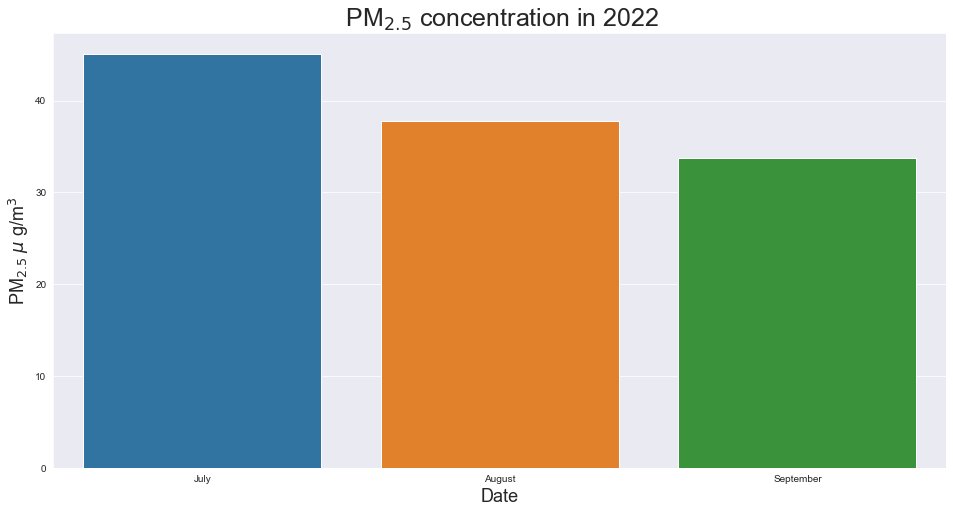

In [28]:
ax = sns.barplot(x="month_name", y="pm2_5", ci=None, data=df_k)
plt.title(' PM$_{2.5}$ concentration in 2022 ',fontsize=25)
plt.ylabel("PM$_{2.5}$ $\mu$ g/m$^3$",fontsize=18) 
 
plt.xlabel('Date',fontsize=18)
plt.show()

In [159]:
df_p = df_k.pivot_table(index ='district',  values='pm2_5')
df_p=df_p.reset_index().sort_values(by='pm2_5',ascending=False)
top_10=df_p.reset_index().sort_values(by='pm2_5',ascending=False)
top_10.head(10)

,index,district,pm2_5
0,11,Kapchorwa,72.504847
1,17,Mbale,63.328043
2,14,Luwero,56.645950
3,8,Kabale,53.249493
4,0,Bududa,48.892401
5,19,Mityana,47.359070
6,6,Iganga,46.780538
7,10,Kampala,42.913784
8,23,Rubirizi,42.218489
9,13,Kisoro,40.075574


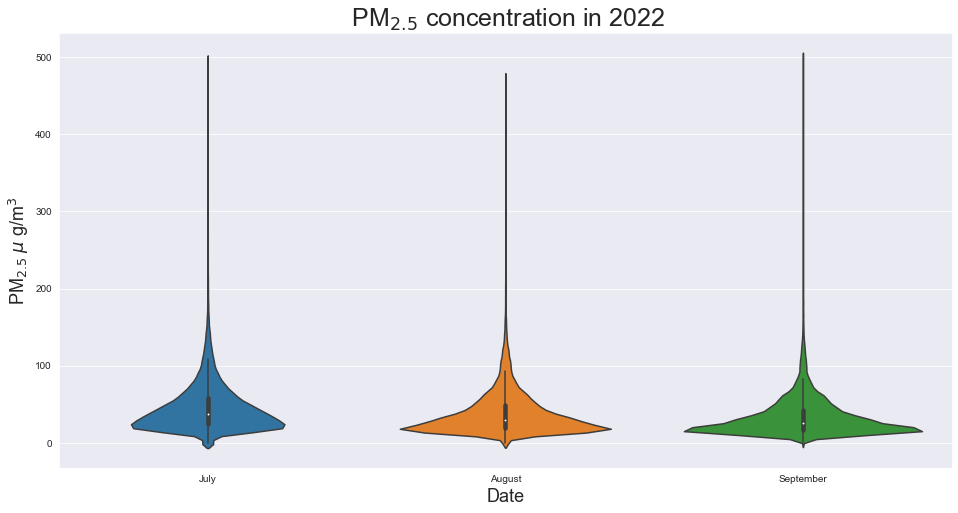

In [29]:
ax = sns.violinplot(x="month_name", y="pm2_5", ci=None, data=df_k)
plt.title(' PM$_{2.5}$ concentration in 2022 ',fontsize=25)
plt.ylabel("PM$_{2.5}$ $\mu$ g/m$^3$",fontsize=18) 
 
plt.xlabel('Date',fontsize=18)
plt.show()

In [173]:
df_u = df_k.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)
df_u=df_u.reset_index().sort_values(by='pm2_5',ascending=False)
df_u.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_11820\4135583619.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_u = df_k.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)


,site_name,pm2_5,site_latitude,site_longitude
46,"Katende Ward, Jinja",81.61,0.47,33.24
67,"Kyanja, Nakawa",74.38,0.39,32.60
41,"Kapchorwa Town, Kapchorwa",72.50,1.40,34.45
9,"Bukikali,Lwaso Mbale",70.79,1.08,34.23
37,Kampala Central,70.35,0.31,32.57
47,"Katwe 1, Makindye",69.23,32.58,0.30
49,Kawempe,66.52,0.36,32.57
102,Nakawa,64.28,0.34,32.61
15,"Busega, Rubaga",62.81,0.31,32.52
114,Rubaga,60.20,0.32,32.55


In [174]:
df_u.tail(10)

,site_name,pm2_5,site_latitude,site_longitude
105,"Nansana west ward, Wakiso",23.04,0.36,32.53
122,"Town Centre, Kasese",22.93,0.18,30.08
36,"Kalerwe, Kawempe",20.26,0.36,32.57
63,"Kivubuka Budondo, Jinja",19.65,0.50,33.19
23,"Central, Soroti",19.03,1.71,33.62
33,"Jinja Main Street, Jinja",18.30,0.43,33.21
56,"Kinyamasika, Fort Portal",18.15,0.63,30.27
68,"Kyebando, Kampala",15.68,0.36,32.58
32,Gulu Main Market,15.68,2.77,32.30
31,Gulu City Council,14.59,2.78,32.30


In [167]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 46 to 31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site_name       127 non-null    object 
 1   pm2_5           127 non-null    float64
 2   site_latitude   127 non-null    float64
 3   site_longitude  127 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.0+ KB


In [175]:
import pandas as pd
import numpy as np
import io
import folium
import branca.colormap as cm


longj =df_u['site_longitude'].mean()
latj = df_u['site_latitude'].mean()

 
# add marker one by one on the map
data=df_u


map = folium.Map(location=[latj,longj], tiles="OpenStreetMap", zoom_start=7)

linear = cm.LinearColormap(["green", "yellow", "red"], vmin=df_u['pm2_5'].min(), vmax=df_u['pm2_5'].max())
 
for _, row in df_u.iterrows():
    folium.CircleMarker([row.site_latitude, row.site_longitude],
                      popup=row.site_name,
                      radius=row.pm2_5/2,
                      color = linear(row.pm2_5),                     
                      fill=True,
                      fill_color=linear(row.pm2_5),
                      opacity=0.5,
                      fill_opacity=0.8
                      ).add_to(map)
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['site_name'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: black ; font-size: 11px;">{data.iloc[i]['pm2_5']}</div>""")
   ).add_to(map) 
map
# save
map.save(r'D:\AIRQO\AirQloud\AQI-OVERVIEW/2022/Uganda.html')

map


# FORT PORTAL

In [152]:
df_fort =df_k[ (df_k['site_name'].str.contains('Fort'))] 

In [153]:
df_fort.head()

,timestamp,pm2_5,pm10,no2_calibrated_value,site_name,site_description,site_latitude,site_longitude,site_altitude,district,county,city,day_name,day_of_week,month,month_name,year,Dates
52,2022-07-01,15.9648,23.825105,NaN,"Booma, Fort Portal","Booma East, Njara Ward, Fort Portal",0.66668,30.28556,1527.619141,Kabarole,Kabarole,Fort Portal,Friday,4,7,July,2022,2022-07-01
53,2022-07-01,13.8951,18.617983,NaN,"Kitere , Fort Portal","Kiteere ,kibimba ward ,fortportal",0.68882,30.26944,1552.710083,Kabarole,Kabarole,Fort Portal,Friday,4,7,July,2022,2022-07-01
55,2022-07-01,15.0380,21.266828,NaN,"Mountains of the Moon University, Fort Portal","Mountains of the moon University, saaka, Fort ...",0.68736,30.24734,1585.995483,Kabarole,Kabarole,Fort Portal,Friday,4,7,July,2022,2022-07-01
56,2022-07-01,12.6412,6.879961,NaN,"Kinyamasika, Fort Portal","Kinyamaska, kijanja ward, Fort Portal",0.63010,30.27343,1543.692383,Kabarole,Kabarole,Fort Portal,Friday,4,7,July,2022,2022-07-01
110,2022-07-01,15.0380,21.266828,NaN,"Mountains of the Moon University, Fort Portal","Mountains of the moon University, saaka, Fort ...",0.68736,30.24734,1585.995483,Kabarole,Kabarole,Fort Portal,Friday,4,7,July,2022,2022-07-01


In [18]:
l1 = df_k['site_name']=='Booma, Fort Portal' 
l2 = df_k['site_name']== 'Kinyamasika, Fort Portal'
l3 = df_k['site_name']== 'Kitere , Fort Portal'
l4 = df_k['site_name']== 'Mountains of the Moon University, Fort Portal'
df_fort=df_k[(l1)|(l2)|(l3)|(l4)  ] 

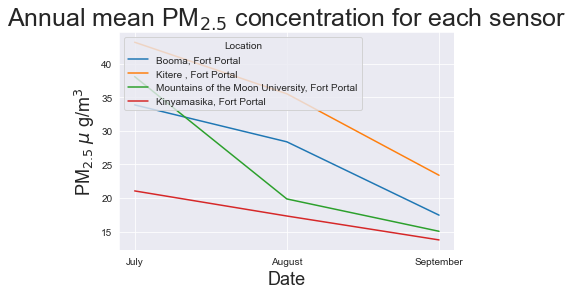

In [19]:
ax = sns.lineplot(x="month_name", y="pm2_5",hue="site_name",ci=None, data=df_fort)
plt.title('Annual mean PM$_{2.5}$ concentration for each sensor ',fontsize=25)
plt.ylabel("PM$_{2.5}$ $\mu$ g/m$^3$",fontsize=18) 
plt.legend(title='Location', loc='upper left')
plt.xlabel('Date',fontsize=18)
plt.show()

In [154]:
df_p = df_fort.pivot_table(index ='site_name',  values='pm2_5')
df_p=df_p.reset_index().sort_values(by='pm2_5',ascending=False)
top_10=df_p.reset_index().sort_values(by='pm2_5',ascending=False)
top_10.head(10)

,index,site_name,pm2_5
0,4,"Kitere , Fort Portal",36.091706
1,5,"Lorry Park, Fort Portal",33.296165
2,6,"Mountains of the Moon University, Fort Portal",33.176947
3,7,"Mpanga, Fort Portal",32.811078
4,1,"Booma, Fort Portal",28.098802
5,2,"Kasusu, Fort Portal",26.106549
6,0,"Bazaar, Fort Portal",25.381709
7,3,"Kinyamasika, Fort Portal",18.152270


In [155]:
df_fort1 = df_fort.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)
df_fort1=df_fort1.reset_index()
df_fort1

C:\Users\User\AppData\Local\Temp\ipykernel_11820\4247028194.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_fort1 = df_fort.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)


,site_name,pm2_5,site_latitude,site_longitude
0,"Bazaar, Fort Portal",25.38,0.65,30.27
1,"Booma, Fort Portal",28.10,0.67,30.29
2,"Kasusu, Fort Portal",26.11,0.62,30.26
3,"Kinyamasika, Fort Portal",18.15,0.63,30.27
4,"Kitere , Fort Portal",36.09,0.69,30.27
5,"Lorry Park, Fort Portal",33.30,0.66,30.27
6,"Mountains of the Moon University, Fort Portal",33.18,0.69,30.25
7,"Mpanga, Fort Portal",32.81,0.66,30.28


In [22]:
import folium
from folium.plugins import HeatMapWithTime

from branca.element import Figure 
fig7=Figure(width=850,height=550)
 
 

In [157]:
import pandas as pd
import numpy as np
import io
import folium
import branca.colormap as cm

 

 
# add marker one by one on the map
data=df_fort1

longf =df_fort1['site_longitude'].mean()
latf = df_fort1['site_latitude'].mean()

map = folium.Map(location=[latf,longf], tiles="OpenStreetMap", zoom_start=13)

 

linear = cm.LinearColormap(["green", "yellow", "red"], vmin=df_fort1['pm2_5'].min(), vmax=df_fort1['pm2_5'].max())
 
for _, row in df_fort1.iterrows():
    folium.CircleMarker([row.site_latitude, row.site_longitude],
                      popup=row.site_name,
                      radius=row.pm2_5/2,
                      color = linear(row.pm2_5),                     
                      fill=True,
                      fill_color=linear(row.pm2_5),
                      opacity=0.5,
                      fill_opacity=0.8
                      ).add_to(map)
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['site_name'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: black ; font-size: 11px;">{data.iloc[i]['pm2_5']}</div>""")
   ).add_to(map) 
map
# save
map.save(r'D:\AIRQO\AirQloud\AQI-OVERVIEW/2022/fortportal.html')

map


In [26]:
# Make an empty map
n = folium.Map(location=[lat,long], tiles="OpenStreetMap", zoom_start=13)

# add marker one by one on the map

for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['pm2_5'],
      radius=float(data.iloc[i]['pm2_5'])*30,
      color='yellow',
      fill=True,
      fill_color='green'
   ).add_to(n)

# add marker one by one on the map
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['pm2_5'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue ; font-size: 12px;background-color: white">{data.iloc[i]['pm2_5']}</div>""")
   ).add_to(n)

# Show the map again
n
# Show the map again


C:\Users\User\AppData\Local\Temp\ipykernel_11820\1389707834.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major')
C:\Users\User\AppData\Local\Temp\ipykernel_11820\1389707834.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor')


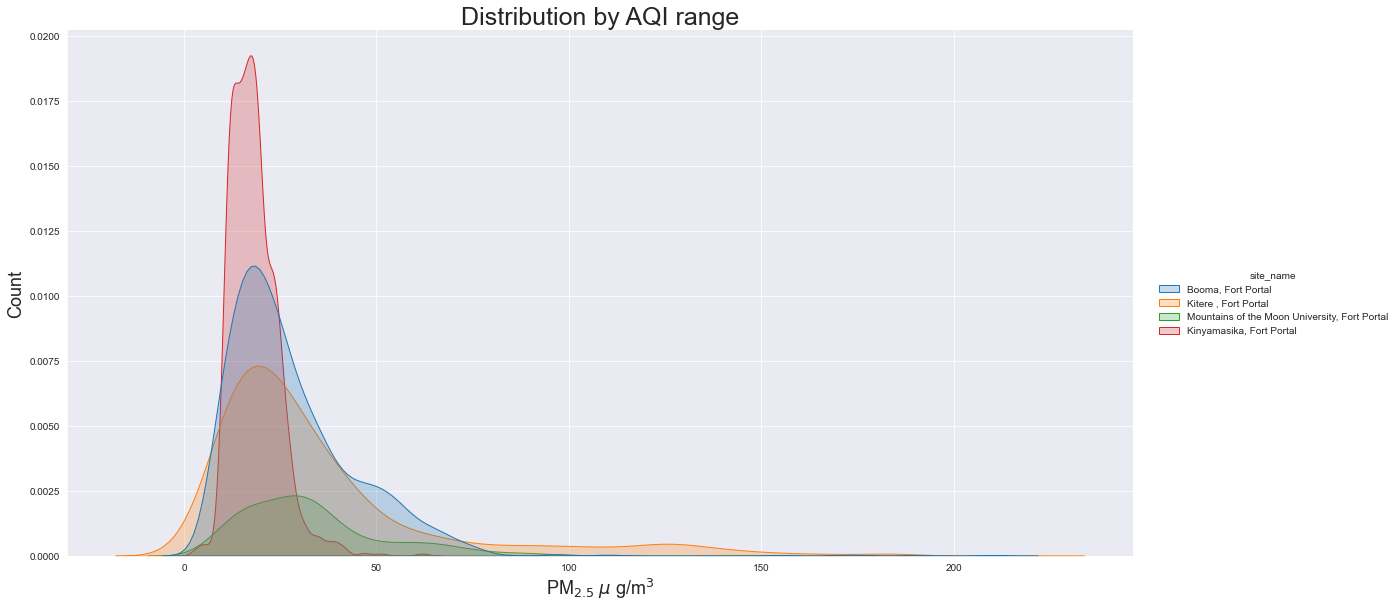

In [35]:
sns.displot(df_fort, x="pm2_5", hue="site_name" , kind="kde", fill=True, height=8, aspect=2) 
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')

plt.xlabel('PM$_{2.5}$ $\mu$ g/m$^3$',fontsize=18) 
plt.ylabel('Count',fontsize=18) 
plt.title('Distribution by AQI range',fontsize=25) 



plt.show()

# kampala

In [33]:
df_kampala=df_k[ df_k['district']=='Kampala'] 

In [36]:
df_kampala.head()

,timestamp,pm2_5,pm10,no2_calibrated_value,site_name,site_description,site_latitude,site_longitude,site_altitude,district,county,city,day_name,day_of_week,month,month_name,year,Dates
0,2022-07-01,39.24,49.84,5.52,Makindye,Makindye,0.285751,32.578325,1212.947510,Kampala,Kampala,Kampala,Friday,4,7,July,2022,2022-07-01
1,2022-07-01,56.27,67.44,4.04,Rubaga,Rubaga,0.329428,32.551303,1231.735962,Kampala,Kampala,Kampala,Friday,4,7,July,2022,2022-07-01
2,2022-07-01,0.00,4115.73,8.33,KampalaCentral,Kampala Central,0.315446,32.586709,1188.103271,Kampala,Kampala,Kampala,Friday,4,7,July,2022,2022-07-01
3,2022-07-01,36.86,65.42,4.46,"Luzira, Nakawa",Nakawa,0.299092,32.647930,1147.767334,Kampala,Kampala,Kampala,Friday,4,7,July,2022,2022-07-01
4,2022-07-01,86.33,135.33,1.26,Kawempe,Kawempe,0.353465,32.560322,1170.848511,Kampala,Kampala,Kampala,Friday,4,7,July,2022,2022-07-01


In [37]:
df_kampala.groupby('site_name')['month_name'].unique()

site_name
Bahai, Kawempe                                     [July, August]
Banda, Kampala                          [July, August, September]
Bugolobi, Nakawa                        [July, August, September]
Bukoto I, Kawempe                       [July, August, September]
Busega, Rubaga                          [July, August, September]
Butabika, Nakawa                        [July, August, September]
Buwate, Kira Municipality               [July, August, September]
Civic Centre, Kampala Central           [July, August, September]
Ggaba, Makindye                         [July, August, September]
Kabalagala town, Makindye               [July, August, September]
Kalerwe, Kawempe                        [July, August, September]
Kampala Central                                    [July, August]
Kampala Uganda                                     [July, August]
KampalaCentral                                     [July, August]
Kansanga Seed Secondary School          [July, August, September]


In [40]:
df_kampala1 = df_kampala.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)
df_kampala1=df_kampala1.reset_index()
df_kampala1

C:\Users\User\AppData\Local\Temp\ipykernel_11820\3903963188.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_kampala1 = df_kampala.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)


,site_name,pm2_5,site_latitude,site_longitude
0,"Bahai, Kawempe",48.29,0.37,32.58
1,"Banda, Kampala",34.59,0.34,32.64
2,"Bugolobi, Nakawa",29.61,0.31,32.62
3,"Bukoto I, Kawempe",36.52,0.35,32.59
4,"Busega, Rubaga",62.81,0.31,32.52
5,"Butabika, Nakawa",51.53,0.31,32.65
6,"Buwate, Kira Municipality",26.45,0.41,32.62
7,"Civic Centre, Kampala Central",49.54,0.31,32.59
8,"Ggaba, Makindye",28.46,0.26,32.64
9,"Kabalagala town, Makindye",46.65,0.30,32.60


In [44]:
longk =df_kampala1['site_longitude'].mean()
latk = df_kampala1['site_latitude'].mean()

mk = folium.Map(location=[latk,longk], tiles="OpenStreetMap", zoom_start=13)

# add marker one by one on the map
data=df_kampala1
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['pm2_5'],
      radius=float(data.iloc[i]['pm2_5'])*20,
      color='yellow',
      fill=True,
      fill_color='green'
   ).add_to(mk)

   # Marker
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['site_name'],
   ).add_to(mk)

# Show the map again  pm2_5	site_latitude	site_longitude	site_name
mk



In [61]:
# Make an empty map
n = folium.Map(location=[latk,longk], tiles="OpenStreetMap", zoom_start=12)

# add marker one by one on the map

for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['site_name'],
      radius=float(data.iloc[i]['pm2_5'])*15,
      color='blue',
      fill=True,
      fill_color='yellow',
      opacity=0.5,
      fill_opacity=0.8
   ).add_to(n)

# add marker one by one on the map
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['site_name'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: black ; font-size: 14px;">{data.iloc[i]['pm2_5']}</div>""")
   ).add_to(n)

# Show the map again
n
# Show the map again


In [105]:
import pandas as pd
import numpy as np
import io
import folium
import branca.colormap as cm

map = folium.Map(location=[latk,longk], tiles="OpenStreetMap", zoom_start=13)

linear = cm.LinearColormap(["green", "yellow", "red"], vmin=df_kampala1['pm2_5'].min(), vmax=df_kampala1['pm2_5'].max())
 
for _, row in df_kampala1.iterrows():
    folium.CircleMarker([row.site_latitude, row.site_longitude],
                      popup=row.site_name,
                      radius=row.pm2_5/3,
                      color = linear(row.pm2_5),                     
                      fill=True,
                      fill_color=linear(row.pm2_5),
                      opacity=0.5,
                      fill_opacity=0.8
                      ).add_to(map)
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['site_name'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: black ; font-size: 11px;">{data.iloc[i]['pm2_5']}</div>""")
   ).add_to(map) 
map



In [106]:
map.save(r'D:\AIRQO\AirQloud\AQI-OVERVIEW/2022/output.html')

# KABALE

In [122]:
#df_kabale=df_k[ df_k['district']=='Kabale'] 

df_kabale=df_k[ df_k['district'].str.contains("Kabale", na = False)] 

In [123]:
df_kabale.groupby('site_name')['month_name'].unique()

site_name
Bunyonyi Region, Kabale                       [July, August, September]
Diocese of Kigezi Region, Kabale              [July, August, September]
Kabale Town, Kabale                           [July, August, September]
Kikungiri Hill, Kabale Municipality Kabale    [July, August, September]
Lower Bugongi, Kabale                         [July, August, September]
Rugarama Hill, Kabale                         [July, August, September]
Rushoroza Hill, Kabale                        [July, August, September]
Name: month_name, dtype: object

In [124]:
df_kabale1 = df_kabale.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)
df_kabale1=df_kabale1.reset_index().sort_values(by='pm2_5',ascending=False)
df_kabale1


C:\Users\User\AppData\Local\Temp\ipykernel_11820\2132267.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_kabale1 = df_kabale.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)


,site_name,pm2_5,site_latitude,site_longitude
5,"Rugarama Hill, Kabale",58.97,-1.25,29.99
3,"Kikungiri Hill, Kabale Municipality Kabale",58.79,-1.27,29.99
6,"Rushoroza Hill, Kabale",54.71,-1.28,29.99
4,"Lower Bugongi, Kabale",52.33,-1.24,29.99
2,"Kabale Town, Kabale",48.81,-1.26,29.99
1,"Diocese of Kigezi Region, Kabale",39.34,-1.24,29.98
0,"Bunyonyi Region, Kabale",38.37,-1.27,29.94


In [128]:
import pandas as pd
import numpy as np
import io
import folium
import branca.colormap as cm


longka =df_kabale1['site_longitude'].mean()
latka = df_kabale1['site_latitude'].mean()

 
# add marker one by one on the map
data=df_kabale1


map = folium.Map(location=[latka,longka], tiles="OpenStreetMap", zoom_start=14)

linear = cm.LinearColormap(["green", "yellow", "red"], vmin=df_kabale1['pm2_5'].min(), vmax=df_kabale1['pm2_5'].max())
 
for _, row in df_kabale1.iterrows():
    folium.CircleMarker([row.site_latitude, row.site_longitude],
                      popup=row.site_name,
                      radius=row.pm2_5/2,
                      color = linear(row.pm2_5),                     
                      fill=True,
                      fill_color=linear(row.pm2_5),
                      opacity=0.5,
                      fill_opacity=0.8
                      ).add_to(map)
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['site_name'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: black ; font-size: 11px;">{data.iloc[i]['pm2_5']}</div>""")
   ).add_to(map) 
map
# save
map.save(r'D:\AIRQO\AirQloud\AQI-OVERVIEW/2022/kabale.html')

map


# JINJA

In [142]:
df_jinja=df_k[ df_k['district'].str.contains("Jinja", na = False)] 

In [143]:
df_jinja.groupby('site_name')['month_name'].unique()

site_name
Buwenge North,  Jinja        [July, August, September]
City Council, Jinja                     [July, August]
Jinja Main Street, Jinja     [July, August, September]
Katende Ward, Jinja                     [July, August]
Kimaka, Jinja                [July, August, September]
Kivubuka Budondo, Jinja      [July, August, September]
Mpumudde, Jinja                         [July, August]
Rubaga Ward, Jinja City                 [July, August]
Walukuba East, Jinja City               [July, August]
YMCA, Jinja                             [July, August]
Name: month_name, dtype: object

In [140]:
l1 = df_jinja['site_name']=='Buwenge North,  Jinja' 
l2 = df_jinja['site_name']== 'Jinja Main Street, Jinja'
l3 = df_jinja['site_name']== 'Kimaka, Jinja '
l4 = df_jinja['site_name']== 'Kivubuka Budondo, Jinja'
df_jinja=df_jinja[(l1)|(l2)|(l3)|(l4)  ] 

In [144]:
df_jinja = df_jinja.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)
df_jinja=df_jinja.reset_index().sort_values(by='pm2_5',ascending=False)
df_jinja


C:\Users\User\AppData\Local\Temp\ipykernel_11820\2231374974.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_jinja = df_jinja.groupby(["site_name"])["pm2_5","site_latitude","site_longitude"].mean().round(2)


,site_name,pm2_5,site_latitude,site_longitude
3,"Katende Ward, Jinja",81.61,0.47,33.24
0,"Buwenge North, Jinja",44.17,0.65,33.17
6,"Mpumudde, Jinja",35.49,0.46,33.21
1,"City Council, Jinja",33.17,0.42,33.21
4,"Kimaka, Jinja",32.22,0.45,33.19
7,"Rubaga Ward, Jinja City",29.53,0.44,33.22
8,"Walukuba East, Jinja City",25.71,0.44,33.23
9,"YMCA, Jinja",23.38,0.44,33.20
5,"Kivubuka Budondo, Jinja",19.65,0.50,33.19
2,"Jinja Main Street, Jinja",18.30,0.43,33.21


In [145]:
import pandas as pd
import numpy as np
import io
import folium
import branca.colormap as cm


longj =df_jinja['site_longitude'].mean()
latj = df_jinja['site_latitude'].mean()

 
# add marker one by one on the map
data=df_jinja


map = folium.Map(location=[latj,longj], tiles="OpenStreetMap", zoom_start=14)

linear = cm.LinearColormap(["green", "yellow", "red"], vmin=df_jinja['pm2_5'].min(), vmax=df_jinja['pm2_5'].max())
 
for _, row in df_jinja.iterrows():
    folium.CircleMarker([row.site_latitude, row.site_longitude],
                      popup=row.site_name,
                      radius=row.pm2_5/2,
                      color = linear(row.pm2_5),                     
                      fill=True,
                      fill_color=linear(row.pm2_5),
                      opacity=0.5,
                      fill_opacity=0.8
                      ).add_to(map)
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['site_name'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: black ; font-size: 11px;">{data.iloc[i]['pm2_5']}</div>""")
   ).add_to(map) 
map
# save
map.save(r'D:\AIRQO\AirQloud\AQI-OVERVIEW/2022/jinja.html')

map
